# Apriori Algoritm or Market basket Analysis

In [58]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [59]:
data=pd.read_csv('Groceries_dataset.csv')
data.head(20)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [60]:
data.shape

(38765, 3)

In [61]:
data.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [63]:
data.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [64]:
data.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

# Data visualiasation

In [65]:
item_dist=data.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False).head(20)

In [66]:
item_dist

,itemDescription,Frequency
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
123,root vegetables,1071
156,tropical fruit,1032
12,bottled water,933
130,sausage,924
30,citrus fruit,812


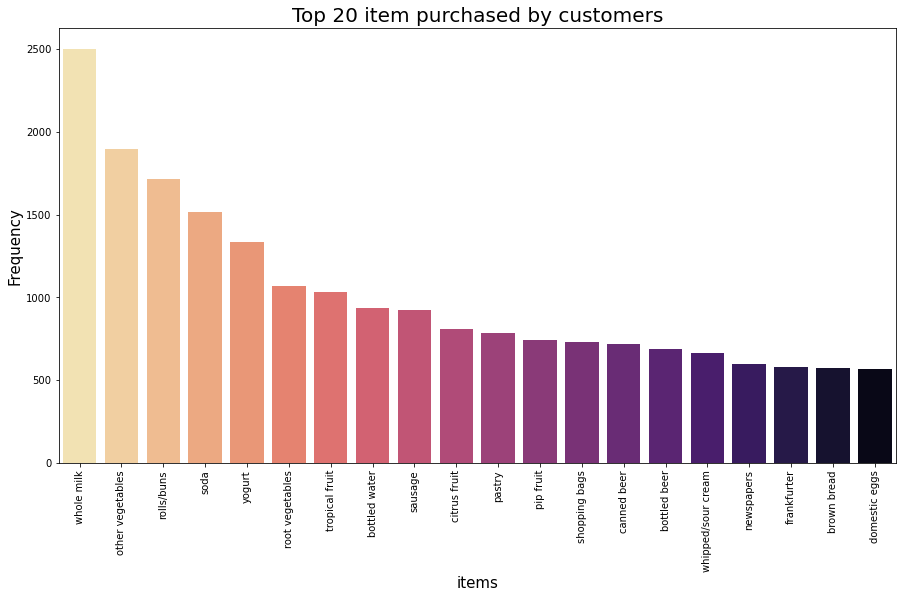

In [67]:
plt.figure(figsize=(15,8))
sns.barplot(x=item_dist['itemDescription'],y=item_dist['Frequency'],palette='magma_r')
plt.xticks(rotation=90)
plt.xlabel('items',size=15)
plt.ylabel('Frequency',size=15)
plt.title('Top 20 item purchased by customers',size=20)
plt.show()

In [68]:
data.itemDescription.value_counts().head().values

array([2502, 1898, 1716, 1514, 1334], dtype=int64)

In [69]:
products=data.itemDescription.unique()

In [70]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [71]:
len(products)

167

In [72]:
dummies=pd.get_dummies(data['itemDescription'])

In [73]:
data=data.join(dummies)

In [74]:
data.head()

,Member_number,Date,itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,tropical fruit,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,whole milk,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,pip fruit,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,other vegetables,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,whole milk,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
data.drop('itemDescription',axis=1,inplace=True)

In [76]:
record=data.groupby(['Member_number','Date'])[products[:]].apply(sum)

In [77]:
record.head(10)

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   
1001          02-05-2015               0           0          0   
              07-02-2014               0           1          0   
              12-12-2014               0           1          0   
              14-04-2015               0           0          0   
              20-01-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   
1001          02-05-2015                 0           0           0   
              07-02-2014                 0           1           0   
              12-12-2014                 0           0           0   
              14-04-2015                 0           0           0   
              20-01-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   
1001          02-05-2015             0     0            1        0  ...   
              07-02-2014             0     0            0        0  ...   
              12-12-2014             0     0            0        0  ...   
              14-04-2015             0     1            0        0  ...   
              20-01-2015             0     0            1        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   
1001          02-05-2015               0     0    0               0   
              07-02-2014               0     0    0               0   
              12-12-2014               0     0    0               0   
              14-04-2015               0     0    0               0   
              20-01-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   
              25-11-2015                     0               0            0   
              27-05-2015                     0               0            0   
1001          02-05-2015                     0               0           

In [78]:
def get_product(p):
    for product in products:
        if p[product]>0:
            p[product]=product
    return p
            
            
record=record.apply(get_product,axis=1) 

In [79]:
record

tropical fruit  whole milk pip fruit  \
Member_number Date                                               
1000          15-03-2015               0  whole milk         0   
              24-06-2014               0  whole milk         0   
              24-07-2015               0           0         0   
              25-11-2015               0           0         0   
              27-05-2015               0           0         0   
...                                  ...         ...       ...   
4999          24-01-2015  tropical fruit           0         0   
              26-12-2015               0           0         0   
5000          09-03-2014               0           0         0   
              10-02-2015               0           0         0   
              16-11-2014               0           0         0   

                          other vegetables rolls/buns pot plants citrus fruit  \
Member_number Date                                                              
1000          15-03-2015                 0          0          0            0   
              24-06-2014                 0          0          0            0   
              24-07-2015                 0          0          0            0   
              25-11-2015                 0          0          0            0   
              27-05-2015                 0          0          0            0   
...                                    ...        ...        ...          ...   
4999          24-01-2015  other vegetables          0          0            0   
              26-12-2015                 0          0          0            0   
5000          09-03-2014                 0          0          0            0   
              10-02-2015                 0          0          0            0   
              16-11-2014  other vegetables          0          0            0   

                         beef frankfurter chicken  ... flower (seeds) rice  \
Member_number Date                                 ...                       
1000          15-03-2015    0           0       0  ...              0    0   
              24-06-2014    0           0       0  ...              0    0   
              24-07-2015    0           0       0  ...              0    0   
              25-11-2015    0           0       0  ...              0    0   
              27-05-2015    0           0       0  ...              0    0   
...                       ...         ...     ...  ...            ...  ...   
4999          24-01-2015    0           0       0  ...              0    0   
              26-12-2015    0           0       0  ...              0    0   
5000          09-03-2014    0           0       0  ...              0    0   
              10-02-2015    0           0       0  ...              0    0   
              16-11-2014    0           0       0  ...              0    0   

                         tea salad dressing specialty vegetables  \
Member_number Date                                                 
1000          15-03-2015   0              0                    0   
              24-06-2014   0              0                    0   
              24-07-2015   0              0                    0   
              25-11-2015   0              0                    0   
              27-05-2015   0              0                    0   
...                       ..            ...                  ...   
4999          24-01-2015   0              0                    0   
              26-12-2015   0              0                    0   
5000          09-03-2014   0              0                    0   
              10-02-2015   0              0                    0   
              16-11-2014   0              0                    0   

                         pudding powder ready soups make up remover  \
Member_number Date                                                    
1000          15-03-2015              0           0               0   


In [80]:
#for removing zeros
dat=record.values
dat

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [81]:
list1=[]
for i in dat:
    list1.append(i[i!=0].tolist())
    

In [82]:
list1

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['other vegetables', 'frozen vegetables'],
 ['whole milk', 'butter'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['rolls/buns', 'sausage'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['tropical fruit', 'whole milk', 'pip fruit'],
 ['rolls/buns', 'chocolate', 'red/blush wine'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'rolls/buns', 'packaged fruit/vegetables', 'chocolate'],
 ['whole milk', 'root vegetables', 'pastry'],
 

In [83]:
len(list1)

14963

In [84]:
#assocaition rule

In [85]:
rules=apriori(list1,min_support=0.0003,min_confidene=0.05,min_lift=3,min_length=2)

In [86]:
association_results=list(rules)
len(association_results)

35

In [87]:
association_results[20]

RelationRecord(items=frozenset({'coffee', 'pastry', 'sausage'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'coffee'}), items_add=frozenset({'sausage', 'pastry'}), confidence=0.010570824524312896, lift=3.2952343199436225), OrderedStatistic(items_base=frozenset({'pastry'}), items_add=frozenset({'coffee', 'sausage'}), confidence=0.006459948320413437, lift=4.833010335917313), OrderedStatistic(items_base=frozenset({'sausage'}), items_add=frozenset({'coffee', 'pastry'}), confidence=0.005537098560354374, lift=3.9453145599325), OrderedStatistic(items_base=frozenset({'coffee', 'pastry'}), items_add=frozenset({'sausage'}), confidence=0.2380952380952381, lift=3.9453145599325), OrderedStatistic(items_base=frozenset({'coffee', 'sausage'}), items_add=frozenset({'pastry'}), confidence=0.25, lift=4.833010335917313), OrderedStatistic(items_base=frozenset({'sausage', 'pastry'}), items_add=frozenset({'coffee'}), confidence=0.10416666666666667, lift=3.295234

In [88]:
for i in association_results[0]:
    print(i,'\n')

frozenset({'frozen fish', 'specialty chocolate'}) 

0.0003341575887188398 

[OrderedStatistic(items_base=frozenset({'frozen fish'}), items_add=frozenset({'specialty chocolate'}), confidence=0.049019607843137254, lift=3.0689556157190907), OrderedStatistic(items_base=frozenset({'specialty chocolate'}), items_add=frozenset({'frozen fish'}), confidence=0.02092050209205021, lift=3.0689556157190907)] 



In [89]:
for item in association_results:
    pair=item[0]
    items=[x for x in pair]
    print('rule'+items[0]+'->'+items[1])
    print('support'+str(item[1]))
    print('confident'+str(item[2][0][2]))
    print('lift',item[2][0][3])

rulefrozen fish->specialty chocolate
support0.0003341575887188398
confident0.049019607843137254
lift 3.0689556157190907
rulefruit/vegetable juice->liver loaf
support0.00040098910646260775
confident0.011787819253438114
lift 3.52762278978389
ruleham->pickled vegetables
support0.0005346521419501437
confident0.03125
lift 3.4895055970149254
ruleroll products ->meat
support0.0003341575887188398
confident0.019841269841269844
lift 3.620547812620984
rulemisc. beverages->salt
support0.0003341575887188398
confident0.0211864406779661
lift 3.5619405827461437
rulemisc. beverages->spread cheese
support0.0003341575887188398
confident0.0211864406779661
lift 3.170127118644068
ruleseasonal products->soups
support0.0003341575887188398
confident0.04716981132075471
lift 14.704205974842766
rulespread cheese->sugar
support0.00040098910646260775
confident0.06
lift 3.3878490566037733
rulesausage->bottled beer
support0.0003341575887188398
confident0.007374631268436578
lift 3.8050554368833285
rulehard cheese->who

# Another method

In [90]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [91]:
from mlxtend.frequent_patterns import apriori,association_rules

In [92]:
data2=pd.read_excel('Online_Retail.xlsx')
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [93]:
data2.shape

(541909, 8)

In [94]:
print(data2['Country'].value_counts())


United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [95]:
data2.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [96]:
#taking one country data
data3=data2[data2['Country']=='France']

In [97]:
data3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [98]:
data3.isna().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID     66
Country         0
dtype: int64

In [99]:
data3['Description'].value_counts()

POSTAGE                              311
RABBIT NIGHT LIGHT                    75
RED TOADSTOOL LED NIGHT LIGHT         72
PLASTERS IN TIN WOODLAND ANIMALS      68
PLASTERS IN TIN CIRCUS PARADE         68
                                    ... 
JAZZ HEARTS ADDRESS BOOK               1
JAZZ HEARTS PURSE NOTEBOOK             1
HANGING HEART ZINC T-LIGHT HOLDER      1
DRAWER KNOB CRACKLE GLAZE PINK         1
VICTORIAN SEWING BOX LARGE             1
Name: Description, Length: 1565, dtype: int64

In [100]:
data3=data3.drop(['StockCode','Quantity','UnitPrice','CustomerID'],axis=1)

In [101]:
data3

,InvoiceNo,Description,InvoiceDate,Country
26,536370,ALARM CLOCK BAKELIKE PINK,2010-12-01 08:45:00,France
27,536370,ALARM CLOCK BAKELIKE RED,2010-12-01 08:45:00,France
28,536370,ALARM CLOCK BAKELIKE GREEN,2010-12-01 08:45:00,France
29,536370,PANDA AND BUNNIES STICKER SHEET,2010-12-01 08:45:00,France
30,536370,STARS GIFT TAPE,2010-12-01 08:45:00,France
...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,2011-12-09 12:50:00,France
541905,581587,CHILDREN'S APRON DOLLY GIRL,2011-12-09 12:50:00,France
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,2011-12-09 12:50:00,France
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,2011-12-09 12:50:00,France


In [102]:
data3.shape

(8557, 4)

In [103]:
dummies=pd.get_dummies(data3['Description'])
new_data=data3.join(dummies)

In [104]:
new_data.drop('Description',axis=1)

,InvoiceNo,InvoiceDate,Country,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
26,536370,2010-12-01 08:45:00,France,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,536370,2010-12-01 08:45:00,France,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,536370,2010-12-01 08:45:00,France,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,536370,2010-12-01 08:45:00,France,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,536370,2010-12-01 08:45:00,France,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,France,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541905,581587,2011-12-09 12:50:00,France,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541906,581587,2011-12-09 12:50:00,France,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541907,581587,2011-12-09 12:50:00,France,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
products=data3['Description'].unique()
products

array(['ALARM CLOCK BAKELIKE PINK', 'ALARM CLOCK BAKELIKE RED ',
       'ALARM CLOCK BAKELIKE GREEN', ..., 'SNACK TRAY I LOVE LONDON',
       'SET OF 6 RIBBONS PERFECTLY PRETTY  ',
       'VICTORIAN SEWING BOX LARGE'], dtype=object)

In [106]:
group=new_data.groupby(['InvoiceNo','InvoiceDate'])[products[:]].apply(sum)

In [107]:
def get_product_names(p):
    for product in products:
        if p[product]>0:
            p[product]=1
        else:
            p[product]
    return p
group=group.apply(get_product_names,axis=1)
            
            
        

In [108]:
group

,,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN,PANDA AND BUNNIES STICKER SHEET,STARS GIFT TAPE,INFLATABLE POLITICAL GLOBE,VINTAGE HEADS AND TAILS CARD GAME,SET/2 RED RETROSPOT TEA TOWELS,ROUND SNACK BOXES SET OF4 WOODLAND,SPACEBOY LUNCH BOX,...,MINT GREEN ROSE TOWEL,SNACK TRAY HAPPY FOREST,RED ENCHANTED FOREST PLACEMAT,PINK POLKADOT PLATE,PAPER LANTERN 9 POINT SNOW STAR,DOORMAT FAIRY CAKE,SKULLS STORAGE BOX LARGE,SNACK TRAY I LOVE LONDON,SET OF 6 RIBBONS PERFECTLY PRETTY,VICTORIAN SEWING BOX LARGE
InvoiceNo,InvoiceDate,,,,,,,,,,,,,,,,,,,,,
536370,2010-12-01 08:45:00,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
536852,2010-12-03 09:51:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,2010-12-03 13:59:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,2010-12-05 11:57:00,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
537463,2010-12-07 10:08:00,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C579532,2011-11-30 09:21:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C579562,2011-11-30 11:39:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C580161,2011-12-02 10:49:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
frequent_items=apriori(group,min_support=.1,use_colnames=True)
rules=association_rules(frequent_items,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND ),(POSTAGE),0.138528,0.673160,0.125541,0.906250,1.346262,0.032289,3.486291
1,(POSTAGE),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.673160,0.138528,0.125541,0.186495,1.346262,0.032289,1.058963
2,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.155844,0.673160,0.134199,0.861111,1.279207,0.029291,2.353247
3,(POSTAGE),(RED TOADSTOOL LED NIGHT LIGHT),0.673160,0.155844,0.134199,0.199357,1.279207,0.029291,1.054347
4,(LUNCH BAG RED RETROSPOT),(POSTAGE),0.132035,0.673160,0.103896,0.786885,1.168942,0.015016,1.533633
5,(POSTAGE),(LUNCH BAG RED RETROSPOT),0.673160,0.132035,0.103896,0.154341,1.168942,0.015016,1.026377
6,(PLASTERS IN TIN WOODLAND ANIMALS),(POSTAGE),0.145022,0.673160,0.116883,0.805970,1.197293,0.019260,1.684482
7,(POSTAGE),(PLASTERS IN TIN WOODLAND ANIMALS),0.673160,0.145022,0.116883,0.173633,1.197293,0.019260,1.034624
8,(POSTAGE),(PLASTERS IN TIN CIRCUS PARADE ),0.673160,0.147186,0.125541,0.186495,1.267070,0.026461,1.048321
9,(PLASTERS IN TIN CIRCUS PARADE ),(POSTAGE),0.147186,0.673160,0.125541,0.852941,1.267070,0.026461,2.222511


In [110]:
rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.108225,0.116883,0.103896,0.960000,8.213333,0.091246,22.077922
0,(ROUND SNACK BOXES SET OF4 WOODLAND ),(POSTAGE),0.138528,0.673160,0.125541,0.906250,1.346262,0.032289,3.486291
12,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.116883,0.108225,0.103896,0.888889,8.213333,0.091246,8.025974
11,(RABBIT NIGHT LIGHT),(POSTAGE),0.162338,0.673160,0.140693,0.866667,1.287460,0.031413,2.451299
2,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.155844,0.673160,0.134199,0.861111,1.279207,0.029291,2.353247
9,(PLASTERS IN TIN CIRCUS PARADE ),(POSTAGE),0.147186,0.673160,0.125541,0.852941,1.267070,0.026461,2.222511
6,(PLASTERS IN TIN WOODLAND ANIMALS),(POSTAGE),0.145022,0.673160,0.116883,0.805970,1.197293,0.019260,1.684482
4,(LUNCH BAG RED RETROSPOT),(POSTAGE),0.132035,0.673160,0.103896,0.786885,1.168942,0.015016,1.533633
10,(POSTAGE),(RABBIT NIGHT LIGHT),0.673160,0.162338,0.140693,0.209003,1.287460,0.031413,1.058996
3,(POSTAGE),(RED TOADSTOOL LED NIGHT LIGHT),0.673160,0.155844,0.134199,0.199357,1.279207,0.029291,1.054347


In [111]:
rules[(rules['lift']>0.025) & (rules['confidence']>0.80)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND ),(POSTAGE),0.138528,0.673160,0.125541,0.906250,1.346262,0.032289,3.486291
2,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.155844,0.673160,0.134199,0.861111,1.279207,0.029291,2.353247
6,(PLASTERS IN TIN WOODLAND ANIMALS),(POSTAGE),0.145022,0.673160,0.116883,0.805970,1.197293,0.019260,1.684482
9,(PLASTERS IN TIN CIRCUS PARADE ),(POSTAGE),0.147186,0.673160,0.125541,0.852941,1.267070,0.026461,2.222511
11,(RABBIT NIGHT LIGHT),(POSTAGE),0.162338,0.673160,0.140693,0.866667,1.287460,0.031413,2.451299
12,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.116883,0.108225,0.103896,0.888889,8.213333,0.091246,8.025974
13,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.108225,0.116883,0.103896,0.960000,8.213333,0.091246,22.077922
